<h3>Maximise Likelihood linear regression on CPU data</h3>


#### Aims 

* Do a Maximise Likelihood linear regression on the X_train and Y_train data in Python
* Compare least square solution with Maximise Likelihood linear regression
* calculate the $w$ and $cov\{\mathbf{w}\}$ to draw $w$ samples and calculate Y_test



#### Tasks 
* Download the data X_train,Y_train,X_test from the Moodle page
* Plot cpu features against cpu performance
* Plot the loss function with the adding of each features
* Using the expressions derived provided in the supplement slides to compute $w$ and $\sigma^2$. 
* Make a performance prediction at 41 CPUs in X_test

#### Taks 1: We start by loading the X_train and Y_train data

In [1]:
import numpy as np 

X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
Y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1][:,None]

MYCT = X_train[:,0][:,None]
MMIN = X_train[:,1][:,None]
MMAX = X_train[:,2][:,None]
CACH = X_train[:,3][:,None]
CHMIN = X_train[:,4][:,None]
CHMAX = X_train[:,5][:,None]


#### Taks 2: Plot the data
<p>It's useful to start with a plot</p>

Text(0, 0.5, 'PRP')

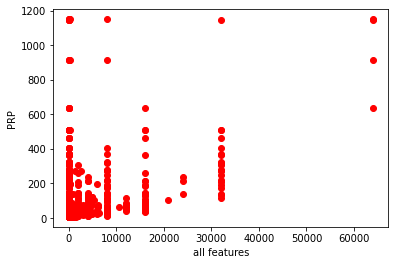

In [2]:
%matplotlib inline
import pylab as plt
plt.plot(X_train, Y_train, 'ro')
plt.xlabel('all features')
plt.ylabel('PRP')

Text(0, 0.5, 'PRP')

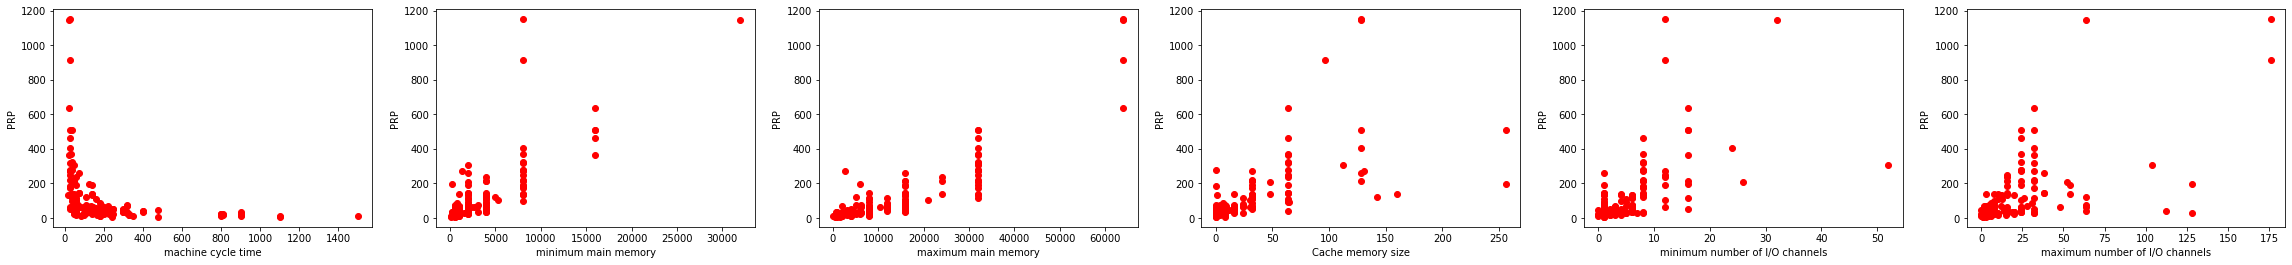

In [3]:
%matplotlib inline
import pylab as plt
fig, axes = plt.subplots(1, 6, figsize=(40, 4))
axes[0].plot(MYCT,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[0].set_xlabel('machine cycle time')
axes[0].set_ylabel('PRP')

axes[1].plot(MMIN,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[1].set_xlabel('minimum main memory')
axes[1].set_ylabel('PRP')

axes[2].plot(MMAX,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[2].set_xlabel('maximum main memory')
axes[2].set_ylabel('PRP')

axes[3].plot(CACH,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[3].set_xlabel('Cache memory size')
axes[3].set_ylabel('PRP')

axes[4].plot(CHMIN,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[4].set_xlabel('minimum number of I/O channels')
axes[4].set_ylabel('PRP')

axes[5].plot(CHMAX,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[5].set_xlabel('maximum number of I/O channels')
axes[5].set_ylabel('PRP')


#### Task 3: Write function for maximum likelihood estimator for $w$ and $\sigma^2$

$$ \hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t},~~\hat{\sigma^2} = \frac{1}{N}\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)$$

In [4]:
def loggausspdf(x,mu,sigma2): # your own function to compute log of gaussian pdf 
    const = -0.5*np.log(2.0*np.pi) - 0.5*np.log(sigma2)
    return const - (1.0/(2*sigma2))*(x-mu)**2

def max_like_w(X, t): # your own function to compute maximum likelihood estimate of w
    return(np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t)))

def max_like_sigma2(X, t, w): # your own function to compute maximum likelihood estimate of sigma^2
    return(((t-np.dot(X,w))**2).mean())

def polynomial(x, max_order): # your own function to construct polynomial design matrix
    X = np.ones_like(x[:,0][:,None])
    for i in range(max_order):
        X = np.hstack((X,x[:,i][:,None]))
    return(X)


#### Task 4: Test the joint likelihood against the adding of features

- log joint likelihood:  $\sum_{n=1}^N \log p(t_n | x_n, w, \sigma^2) = \sum_{n=1}^N \log \mathcal{N} (t_n; \mathbf{x}_n^T \mathbf{w}, \sigma^2)$
- log joint likelihood at $\hat{\mathbf{w}}$ and $\hat{\sigma^2}$: $\sum_{n=1}^N \log \mathcal{N}(t_n; \mathbf{x}_n^T \hat{\mathbf{w}}, \hat{\sigma^2})$

(168, 1)
(168, 2)
(168, 3)
(168, 4)
(168, 5)
(168, 6)


Text(0.5, 0, 'adding each features')

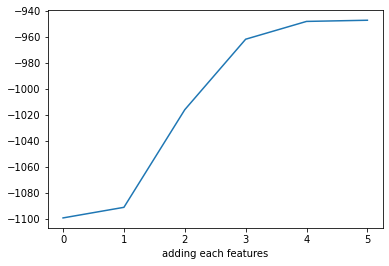

In [5]:
max_order = 6 # maximum order 

L = np.zeros((max_order,1))# preallocate log joint likelihoods
for i in np.arange(max_order):# for loop over all faetures
    X = polynomial(X_train, i)
    print(X.shape)
    w_ml = max_like_w(X,Y_train) # compute maximum likelihood estimate of w
    sigma2_ml = max_like_sigma2(X,Y_train, w_ml) # compute maximum likelihood estimate of sigma^2
    L[i] = loggausspdf(Y_train,np.dot(X,w_ml),sigma2_ml).sum() # compute the log-joint likelihood 
                                                         # at the maximum likelihood estimates
plt.plot(np.arange(max_order),L) # plot L vs adding of features
plt.xlabel('adding each features')

#### Task 5: Predictive variance example, step up
<p>In this example, we look at the predictive variance. Recall that, for maximum likelihood estimators
$$ \hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t},~~\hat{\sigma^2} = \frac{1}{N}\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)$$
we have mean prediction:
$$ t_{new} = \hat{\mathbf{w}}^T\mathbf{x}_{new}$$
and variance:
$$ \mbox{var}(t_{new}) = \hat{\sigma^2}\mathbf{x}_{new}^T\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{x}_{new}$$

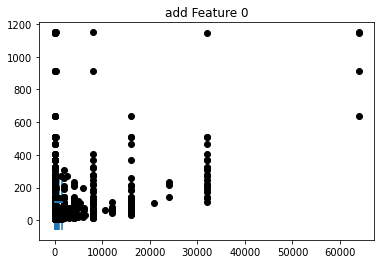

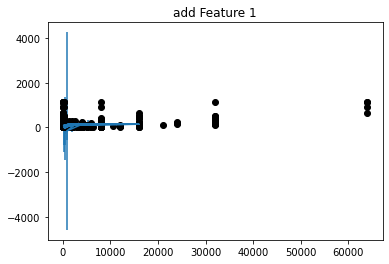

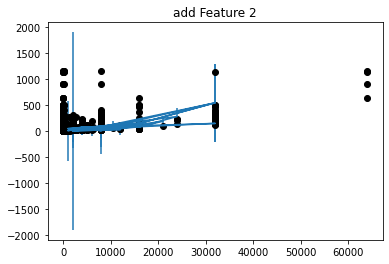

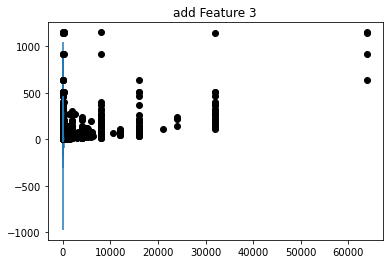

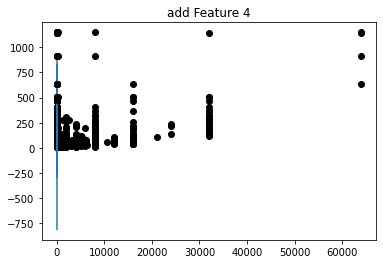

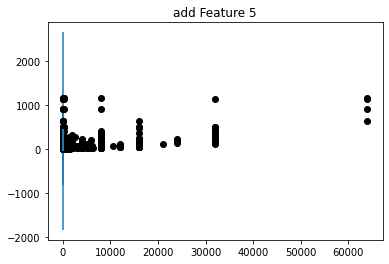

In [6]:
# new x to predict 
orders = max_order# array of possible orders
for i in range(orders):
    X = polynomial(X_train, i) # construct polynoimals on training data
    testX = polynomial(X_test, i) # construct polynoimals on new data
    w = max_like_w(X, Y_train) # compute maximum likelihood estimate of w
    sigma2 = max_like_sigma2(X, Y_train, w) # compute maximum likelihood estimate of sigma2
    test_mean = np.dot(testX,w) # expected prediction 
    test_var = np.diag(sigma2*np.dot(np.dot(testX,np.linalg.inv(np.dot(X.T,X))), 
                                     testX.T))[:,None] # prediction variance
    plt.figure()
    plt.plot(X_train,Y_train,'ko') # plot training data
    plt.errorbar(X_test[:,i][:,None].flatten(), test_mean.flatten(), yerr=test_var.flatten()) # plot error bar
    plt.title("add Feature " + str(i))

#### Task 6: Sample models from $\mathcal{N}(\hat{\mathbf{w}}, cov\{\mathbf{w}\} ) $

$$\hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$
$$cov\{\mathbf{w}\} = \hat{\sigma^2} \left(\mathbf{X}^T\mathbf{X}\right)^{-1} $$

adding feature 0
adding feature 1
adding feature 2
adding feature 3
adding feature 4
adding feature 5


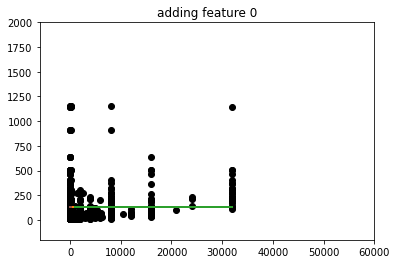

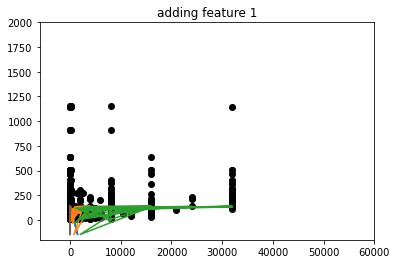

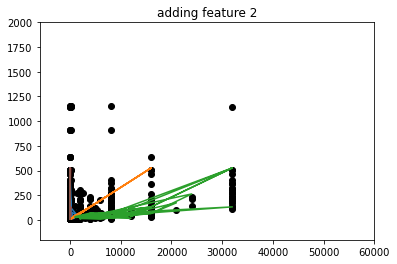

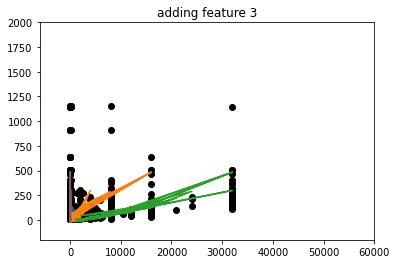

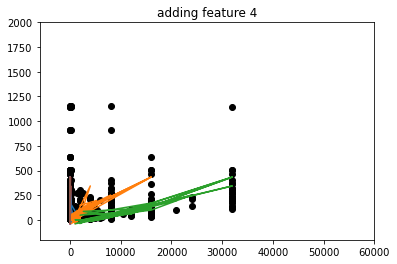

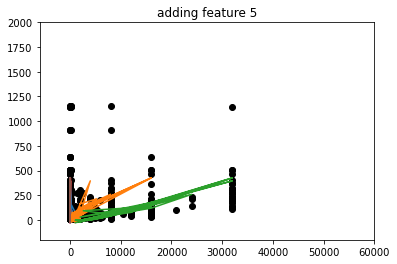

In [7]:
orders = max_order
for i in range(orders):
    X = polynomial(X_train, i) # construct polynoimals on training data
    testX = polynomial(X_test, i) # construct polynoimals on new data
    w = max_like_w(X, Y_train) # compute maximum likelihood estimate of w 
    sigma2 = max_like_sigma2(X, Y_train, w) # compute maximum likelihood estimate of sigma2
    covw = sigma2*np.linalg.inv(np.dot(X.T,X)) # covariance of w
    sampw = np.random.multivariate_normal(w.flatten(),covw,1) # generate samples of w
    Y_test = np.dot(testX,sampw.T) # model prediction based on sampw
    plt.figure()
    plt.plot(X_train,Y_train,'ko')
    plt.plot(X_test, Y_test)
    plt.xlim([-6000,60000])
    plt.ylim([-200,2000])
    plt.title('adding feature ' + str(i))
    print("adding feature " + str(i))

In [8]:
test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = Y_test[:,0]
print(y_pred_pp)
np.savetxt('my_submission_ml.csv', y_pred_pp, fmt='%d', delimiter=",",header=test_header, comments="")

[[  0.         163.94545997]
 [  1.         214.39387693]
 [  2.          41.76573764]
 [  3.          17.83566671]
 [  4.          -2.92984774]
 [  5.          67.89727118]
 [  6.         177.07049324]
 [  7.          29.64538951]
 [  8.          99.32458439]
 [  9.         -15.29681316]
 [ 10.          59.42443173]
 [ 11.          17.86528786]
 [ 12.         -27.44496364]
 [ 13.          40.97139936]
 [ 14.          14.70390277]
 [ 15.          45.30130479]
 [ 16.         426.22724493]
 [ 17.          79.90094072]
 [ 18.         426.11738937]
 [ 19.          54.28329198]
 [ 20.           2.55462815]
 [ 21.          -2.48720363]
 [ 22.           4.70292857]
 [ 23.         136.99073367]
 [ 24.          93.83392203]
 [ 25.          57.23896334]
 [ 26.         396.52270769]
 [ 27.         -11.70642927]
 [ 28.         260.36152112]
 [ 29.         119.79853201]
 [ 30.          51.64680652]
 [ 31.           3.08512742]
 [ 32.          -2.07537657]
 [ 33.         134.27178848]
 [ 34.        

#### Task 7: make X_train with 4 features by combining feature

In [9]:
MYCT = X_train[:,0][:,None]
MMIN = X_train[:,1][:,None]
MMAX = X_train[:,2][:,None]
CACH = X_train[:,3][:,None]
CHMIN = X_train[:,4][:,None]
CHMAX = X_train[:,5][:,None]
Average_N_CH = (CHMIN + CHMAX)/2
Average_M_M = (MMIN+MMAX)/2

# allocate new X_train with 4 features
X_new_train = MYCT
X_new_train = np.hstack((X_new_train,Average_M_M))
X_new_train = np.hstack((X_new_train,CACH))
X_new_train = np.hstack((X_new_train,Average_N_CH))
# allocate new Y_train with original Y_train
Y_new_train = Y_train


MYCT_test = X_test[:,0][:,None]
MMIN_test = X_test[:,1][:,None]
MMAX_test = X_test[:,2][:,None]
CACH_test = X_test[:,3][:,None]
CHMIN_test = X_test[:,4][:,None]
CHMAX_test = X_test[:,5][:,None]
Average_N_CH_test = (CHMIN_test + CHMAX_test)/2
Average_M_M_test = (MMIN_test+MMAX_test)/2

# allocate new X_test with 4 features
X_new_test = MYCT_test
X_new_test = np.hstack((X_new_test,Average_M_M_test))
X_new_test = np.hstack((X_new_test,CACH_test))
X_new_test = np.hstack((X_new_test,Average_N_CH_test))

Text(0.5, 1.0, 'all feature ')

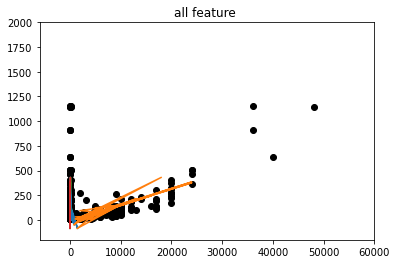

In [10]:
X = X_new_train# construct polynoimals on training data
testX = X_new_test # construct polynoimals on new data
w = max_like_w(X, Y_new_train) # compute maximum likelihood estimate of w 
sigma2 = max_like_sigma2(X, Y_new_train, w) # compute maximum likelihood estimate of sigma2
covw = sigma2*np.linalg.inv(np.dot(X.T,X)) # covariance of w
sampw = np.random.multivariate_normal(w.flatten(),covw,1) # generate samples of w
Y_new_test = np.dot(testX,sampw.T) # model prediction based on sampw
plt.figure()
plt.plot(X_new_train,Y_new_train,'ko')
plt.plot(X_new_test, Y_new_test)
plt.xlim([-6000,60000])
plt.ylim([-200,2000])
plt.title('all feature ')

In [11]:
test_header = "Id,PRP"
n_points = X_new_test.shape[0]
y_pred_pp_new = np.ones((n_points, 2))
y_pred_pp_new[:, 0] = range(n_points)
y_pred_pp_new[:, 1] = Y_new_test[:,0]
print(y_pred_pp_new)
np.savetxt('my_submission_new_ml.csv', y_pred_pp_new, fmt='%d', delimiter=",",header=test_header, comments="")

[[  0.         145.23797098]
 [  1.         216.33330725]
 [  2.          41.84479758]
 [  3.          32.54419275]
 [  4.         -31.66755166]
 [  5.          30.93684826]
 [  6.         155.19267457]
 [  7.         -86.25937649]
 [  8.         129.91248005]
 [  9.           9.27570689]
 [ 10.          71.64943052]
 [ 11.          14.23438129]
 [ 12.          10.9108208 ]
 [ 13.          72.46931279]
 [ 14.          46.4659592 ]
 [ 15.          68.7601171 ]
 [ 16.         376.7471681 ]
 [ 17.          95.73464049]
 [ 18.         385.59065771]
 [ 19.          68.50572361]
 [ 20.          24.76727304]
 [ 21.         -49.50983044]
 [ 22.          40.40111152]
 [ 23.         153.49523805]
 [ 24.          94.82666011]
 [ 25.          82.61169823]
 [ 26.         431.81640778]
 [ 27.           8.39272097]
 [ 28.         245.11530943]
 [ 29.         128.14519406]
 [ 30.           9.18491327]
 [ 31.          38.24259528]
 [ 32.          21.83091497]
 [ 33.         146.02521436]
 [ 34.        

#### Task 8: make X_train with RBF basis function

In [12]:
def rbf (x, center, width):  
    X = np.exp( -0.5*(x-center[0])**2/width)
    return(X)

center = X_new_train

width = 10
X_new_train_rbf = rbf(X_new_train, center, width)
X_new_test_rbf = rbf(X_new_test,center,width)

Text(0.5, 1.0, 'all feature ')

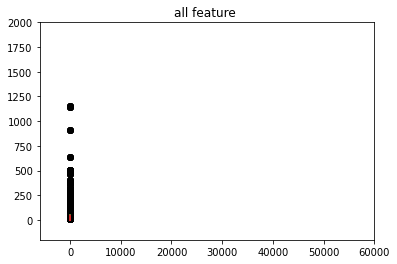

In [13]:
X = X_new_train_rbf# construct polynoimals on training data
testX = X_new_test_rbf # construct polynoimals on new data
w = max_like_w(X, Y_new_train) # compute maximum likelihood estimate of w 
sigma2 = max_like_sigma2(X, Y_new_train, w) # compute maximum likelihood estimate of sigma2
covw = sigma2*np.linalg.inv(np.dot(X.T,X)) # covariance of w
sampw = np.random.multivariate_normal(w.flatten(),covw,1) # generate samples of w
Y_new_rbf_test = np.dot(testX,sampw.T) # model prediction based on sampw
plt.figure()
plt.plot(X_new_train_rbf,Y_new_train,'ko')
plt.plot(X_new_test_rbf, Y_new_rbf_test)
plt.xlim([-6000,60000])
plt.ylim([-200,2000])
plt.title('all feature ')

In [14]:
test_header = "Id,PRP"
n_points = X_new_test.shape[0]
y_pred_pp_rbf_new = np.ones((n_points, 2))
y_pred_pp_rbf_new[:, 0] = range(n_points)
y_pred_pp_rbf_new[:, 1] = Y_new_rbf_test[:,0]
print(y_pred_pp_new)
np.savetxt('my_submission_new_rbf_ml.csv', y_pred_pp_rbf_new, fmt='%d', delimiter=",",header=test_header, comments="")

[[  0.         145.23797098]
 [  1.         216.33330725]
 [  2.          41.84479758]
 [  3.          32.54419275]
 [  4.         -31.66755166]
 [  5.          30.93684826]
 [  6.         155.19267457]
 [  7.         -86.25937649]
 [  8.         129.91248005]
 [  9.           9.27570689]
 [ 10.          71.64943052]
 [ 11.          14.23438129]
 [ 12.          10.9108208 ]
 [ 13.          72.46931279]
 [ 14.          46.4659592 ]
 [ 15.          68.7601171 ]
 [ 16.         376.7471681 ]
 [ 17.          95.73464049]
 [ 18.         385.59065771]
 [ 19.          68.50572361]
 [ 20.          24.76727304]
 [ 21.         -49.50983044]
 [ 22.          40.40111152]
 [ 23.         153.49523805]
 [ 24.          94.82666011]
 [ 25.          82.61169823]
 [ 26.         431.81640778]
 [ 27.           8.39272097]
 [ 28.         245.11530943]
 [ 29.         128.14519406]
 [ 30.           9.18491327]
 [ 31.          38.24259528]
 [ 32.          21.83091497]
 [ 33.         146.02521436]
 [ 34.        